In [1]:
# Importing necessary libraries
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, LeakyReLU
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation
from tensorflow.keras.optimizers.legacy import RMSprop, Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


In [2]:
def build_simple_cnn(img_rows, img_cols, img_channels, n_classes, dropout_rate, activation):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(img_rows, img_cols, img_channels), activation=activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    model.add(Flatten())
    model.add(Dense(512, activation=activation))
    model.add(Dropout(dropout_rate))

    model.add(Dense(n_classes, activation='softmax'))
    return model

def build_deep_cnn(img_rows, img_cols, img_channels, n_classes, dropout_rate, activation):
    model = Sequential()

    model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(img_rows, img_cols, img_channels), activation=activation))
    model.add(Conv2D(32, kernel_size=3, padding='same', activation=activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    model.add(Conv2D(64, kernel_size=3, padding='same', activation=activation))
    model.add(Conv2D(64, kernel_size=3, padding='same', activation=activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    model.add(Flatten())
    model.add(Dense(512, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(n_classes, activation='softmax'))

    return model

In [3]:
def plot_training_history(history, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title(f'{title} - Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['train', 'val'], loc='upper left')

    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title(f'{title} - Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend(['train', 'val'], loc='upper right')

    plt.tight_layout()
    plt.show()

In [4]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

print('Image variables initialisation')

Image variables initialisation


In [5]:
# Hyperparameters for the deep CNN
batch_sizes = [64, 128]
dropout_rates = [0.0, 0.2, 0.4]
activations = ['relu', 'tanh', 'sigmoid']
learning_rates = [0.001, 0.01, 0.1]

# Training constants
VERBOSE = 1
VALIDATION_SPLIT = 0.2
N_CLASSES = 10
N_EPOCH = 15

In [6]:
# Load CIFAR-10 dataset
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')

# Preprocess the data
input_X_train = input_X_train.astype('float32') / 255
input_X_test = input_X_test.astype('float32') / 255
output_Y_train = to_categorical(output_y_train, N_CLASSES)
output_Y_test = to_categorical(output_y_test, N_CLASSES)

170498071/170498071 [==============================] - 4s 0us/step
input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [7]:
# Train the base model (simple CNN)
base_model = build_simple_cnn(IMG_ROWS, IMG_COLS, IMG_CHANNELS, N_CLASSES, dropout_rate=0.0, activation='relu')
base_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])
base_history = base_model.fit(input_X_train, output_Y_train, batch_size=len(input_X_train), epochs=N_EPOCH, validation_split=VALIDATION_SPLIT, verbose=VERBOSE)
base_test_loss, base_test_acc = base_model.evaluate(input_X_test, output_Y_test, verbose=0)
print(f"Base Model Test Accuracy: {base_test_acc:.4f}")

Epoch 1/15
1/1 [==============================] - 12s 12s/step - loss: 2.3152 - accuracy: 0.1004 - val_loss: 4.2339 - val_accuracy: 0.1022
Epoch 2/15
1/1 [==============================] - 1s 597ms/step - loss: 4.2607 - accuracy: 0.0996 - val_loss: 4.1341 - val_accuracy: 0.1265
Epoch 3/15
1/1 [==============================] - 1s 593ms/step - loss: 4.1362 - accuracy: 0.1225 - val_loss: 3.2443 - val_accuracy: 0.1558
Epoch 4/15
1/1 [==============================] - 1s 590ms/step - loss: 3.2152 - accuracy: 0.1568 - val_loss: 2.6212 - val_accuracy: 0.1945
Epoch 5/15
1/1 [==============================] - 1s 592ms/step - loss: 2.5998 - accuracy: 0.1972 - val_loss: 2.3425 - val_accuracy: 0.2260
Epoch 6/15
1/1 [==============================] - 1s 614ms/step - loss: 2.3293 - accuracy: 0.2288 - val_loss: 2.2222 - val_accuracy: 0.2510
Epoch 7/15
1/1 [==============================] - 1s 594ms/step - loss: 2.2119 - accuracy: 0.2508 - val_loss: 2.1352 - val_accuracy: 0.2787
Epoch 8/15
1/1 [=====

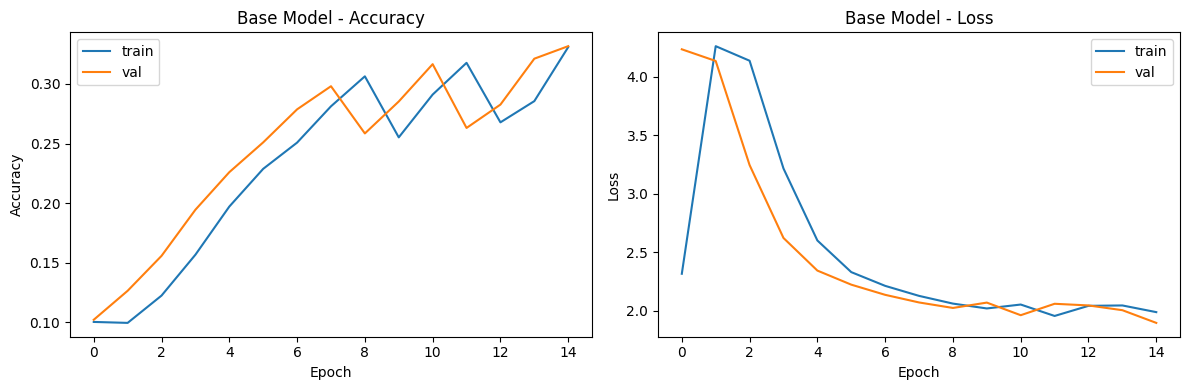

In [8]:
# Plot the training history for the base model
plot_training_history(base_history, 'Base Model')

In [ ]:
# Hyperparameter tuning for the deep CNN
deep_cnn_results = []
deep_cnn_histories = []
for batch_size in batch_sizes:
    for dropout_rate in dropout_rates:
        for activation in activations:
            for learning_rate in learning_rates:
                # Create the deep CNN model with the current hyperparameters
                deep_model = build_deep_cnn(IMG_ROWS, IMG_COLS, IMG_CHANNELS, N_CLASSES, dropout_rate, activation)
                deep_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=learning_rate), metrics=['accuracy'])

                print(f"\nTraining Deep CNN with: batch_size={batch_size}, dropout_rate={dropout_rate}, activation='{activation}', learning_rate={learning_rate}")
                deep_history = deep_model.fit(input_X_train, output_Y_train, batch_size=batch_size, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT, verbose=VERBOSE)
                deep_cnn_histories.append(deep_history)
                deep_test_loss, deep_test_acc = deep_model.evaluate(input_X_test, output_Y_test, verbose=0)
                print(f"Deep CNN Test Accuracy: {deep_test_acc:.4f}")

                # Store the results
                deep_cnn_results.append((batch_size, dropout_rate, activation, learning_rate, deep_test_acc))


Training Deep CNN with: batch_size=64, dropout_rate=0.0, activation='relu', learning_rate=0.001
Epoch 1/15
625/625 [==============================] - 4s 5ms/step - loss: 1.5623 - accuracy: 0.4395 - val_loss: 1.2354 - val_accuracy: 0.5558
Epoch 2/15
625/625 [==============================] - 3s 4ms/step - loss: 1.0378 - accuracy: 0.6331 - val_loss: 0.9239 - val_accuracy: 0.6769
Epoch 3/15
625/625 [==============================] - 3s 4ms/step - loss: 0.7904 - accuracy: 0.7254 - val_loss: 0.8183 - val_accuracy: 0.7176
Epoch 4/15
625/625 [==============================] - 3s 4ms/step - loss: 0.6035 - accuracy: 0.7900 - val_loss: 0.7756 - val_accuracy: 0.7398
Epoch 5/15
625/625 [==============================] - 3s 4ms/step - loss: 0.4362 - accuracy: 0.8505 - val_loss: 0.8940 - val_accuracy: 0.7286
Epoch 6/15
625/625 [==============================] - 3s 4ms/step - loss: 0.3019 - accuracy: 0.8982 - val_loss: 0.9420 - val_accuracy: 0.7470
Epoch 7/15
625/625 [==============================]

In [11]:
# Print the summary of results
print("\nDeep CNN Hyperparameter Tuning Results:")
print("Batch Size | Dropout Rate | Activation | Learning Rate | Test Accuracy")
for result in deep_cnn_results:
    print(f"{result[0]:11} | {result[1]:12} | {result[2]:10} | {result[3]:13} | {result[4]:.4f}")

# Find the best hyperparameter combination
best_result = max(deep_cnn_results, key=lambda x: x[4])
best_batch_size, best_dropout_rate, best_activation, best_learning_rate, best_accuracy = best_result

print(f"\nBest Hyperparameters for Deep CNN:")
print(f"Batch Size: {best_batch_size}")
print(f"Dropout Rate: {best_dropout_rate}")
print(f"Activation: {best_activation}")
print(f"Learning Rate: {best_learning_rate}")
print(f"Test Accuracy: {best_accuracy:.4f}")


Deep CNN Hyperparameter Tuning Results:
Batch Size | Dropout Rate | Activation | Learning Rate | Test Accuracy
         64 |          0.0 | relu       |         0.001 | 0.7208
         64 |          0.0 | relu       |          0.01 | 0.1000
         64 |          0.0 | relu       |           0.1 | 0.1000
         64 |          0.0 | tanh       |         0.001 | 0.7075
         64 |          0.0 | tanh       |          0.01 | 0.1000
         64 |          0.0 | tanh       |           0.1 | 0.1000
         64 |          0.0 | sigmoid    |         0.001 | 0.6192
         64 |          0.0 | sigmoid    |          0.01 | 0.1000
         64 |          0.0 | sigmoid    |           0.1 | 0.1000
         64 |          0.2 | relu       |         0.001 | 0.7704
         64 |          0.2 | relu       |          0.01 | 0.1000
         64 |          0.2 | relu       |           0.1 | 0.1000
         64 |          0.2 | tanh       |         0.001 | 0.7228
         64 |          0.2 | tanh       |  